SVM (RBF) Model
-----------------------------

In [2]:
# Getting the dataset from the .npz file
import numpy as np

np.random.seed(42)

# Loading the data (NON-PCA)
data = np.load("preprocessed_data.npz")
x_train_flat, y_train = data["x_train_flat"], data["y_train"]
x_val_flat, y_val = data["x_val_flat"], data["y_val"]
x_test_flat, y_test = data["x_test_flat"], data["y_test"]

# Loading the data (PCA)
data2 = np.load("preprocessed_data_pca95.npz")
x_train_pca95, y_train = data2["x_train_pca95"], data2["y_train"]
x_val_pca95, y_val = data2["x_val_pca95"], data2["y_val"]
x_test_pca95, y_test = data2["x_test_pca95"], data2["y_test"]

In [1]:
# Function to train and evaluate SVM model (Non-PCA)
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import time

def train_evaluate_svm(C_val, x_train, y_train, x_val, y_val, x_test, y_test):
    svm = SVC(kernel='rbf', C=C_val, probability=False, gamma='scale')  # probability=False for speed

    start_time = time.time()
    svm.fit(x_train, y_train)
    train_time = time.time() - start_time

    y_train_pred = svm.predict(x_train)
    y_val_pred = svm.predict(x_val)
    y_test_pred = svm.predict(x_test)

    train_acc = accuracy_score(y_train, y_train_pred)
    val_acc = accuracy_score(y_val, y_val_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    overfit_gap = train_acc - val_acc

    print(f"\nSVM Model (C={C_val}):")
    print(f"Train Accuracy: {train_acc:.4f}")
    print(f"Val Accuracy:   {val_acc:.4f}")
    print(f"Test Accuracy:  {test_acc:.4f}")
    print(f"Overfitting Gap: {overfit_gap:.4f}")
    print(f"Training Time:   {train_time:.2f} seconds")

    return {
        'train_acc': train_acc,
        'val_acc': val_acc,
        'test_acc': test_acc,
        'overfit_gap': overfit_gap,
        'train_time': train_time
    }

Training this model on google colab because VSCode training time is reaching a 16 minutes mark!

In [3]:
# C = 0.1
svm_c01 = train_evaluate_svm(0.1, x_train_flat, y_train, x_val_flat, y_val, x_test_flat, y_test)


SVM Model (C=0.1):
Train Accuracy: 0.8539
Val Accuracy:   0.8501
Test Accuracy:  0.8450
Overfitting Gap: 0.0037
Training Time:   315.01 seconds


In [4]:
# C = 10
svm_c10 = train_evaluate_svm(10, x_train_flat, y_train, x_val_flat, y_val, x_test_flat, y_test)


SVM Model (C=10):
Train Accuracy: 0.9731
Val Accuracy:   0.9043
Test Accuracy:  0.9036
Overfitting Gap: 0.0688
Training Time:   157.11 seconds


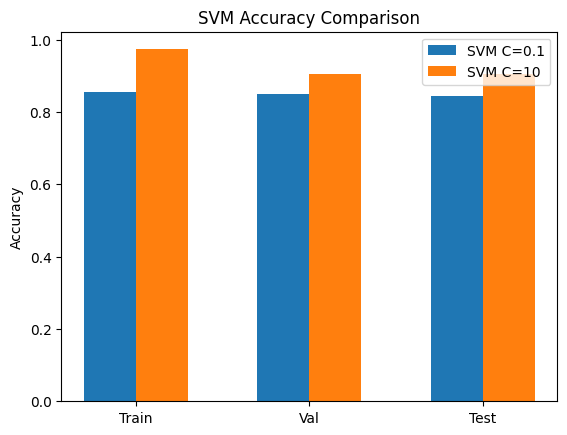

In [6]:
# Plot comparison
labels = ['Train', 'Val', 'Test']

# Accuracy plot
plt.bar([0, 1, 2], [svm_c01['train_acc'], svm_c01['val_acc'], svm_c01['test_acc']], width=0.3, label='SVM C=0.1')
plt.bar([x + 0.3 for x in [0, 1, 2]], [svm_c10['train_acc'], svm_c10['val_acc'], svm_c10['test_acc']], width=0.3, label='SVM C=10')
plt.xticks([0.15, 1.15, 2.15], labels)
plt.ylabel('Accuracy')
plt.title('SVM Accuracy Comparison')
plt.legend()
plt.show()


In [7]:
# Now train Models on PCA Dataset
# C = 0.1
svm_c01_pca = train_evaluate_svm(0.1, x_train_pca95, y_train, x_val_pca95, y_val, x_test_pca95, y_test)


SVM Model (C=0.1):
Train Accuracy: 0.8611
Val Accuracy:   0.8560
Test Accuracy:  0.8528
Overfitting Gap: 0.0051
Training Time:   147.97 seconds


In [8]:
# C = 10
svm_c10_pca = train_evaluate_svm(10, x_train_pca95, y_train, x_val_pca95, y_val, x_test_pca95, y_test)


SVM Model (C=10):
Train Accuracy: 0.9718
Val Accuracy:   0.9070
Test Accuracy:  0.9073
Overfitting Gap: 0.0648
Training Time:   84.14 seconds


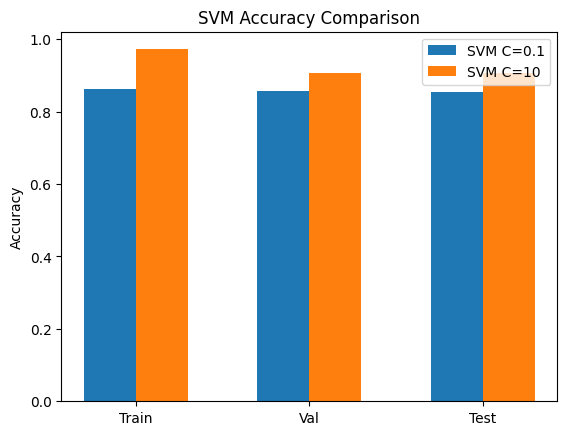

In [9]:
# Plot comparison
labels = ['Train', 'Val', 'Test']

# Accuracy plot
plt.bar([0, 1, 2], [svm_c01_pca['train_acc'], svm_c01_pca['val_acc'], svm_c01_pca['test_acc']], width=0.3, label='SVM C=0.1')
plt.bar([x + 0.3 for x in [0, 1, 2]], [svm_c10_pca['train_acc'], svm_c10_pca['val_acc'], svm_c10_pca['test_acc']], width=0.3, label='SVM C=10')
plt.xticks([0.15, 1.15, 2.15], labels)
plt.ylabel('Accuracy')
plt.title('SVM Accuracy Comparison')
plt.legend()
plt.show()